<a href="https://colab.research.google.com/github/MovinduSenura/Chest-Xray-Pneumonia-Detection/blob/main/notebooks/Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import os
import time


In [3]:
test_dir = '/content/drive/MyDrive/DL_Assignment/chest_xray/test'

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


In [4]:
models = {
    "Custom CNN": tf.keras.models.load_model('/content/drive/MyDrive/Final_Model_2/custom_cnn.keras'),
    "ResNet": tf.keras.models.load_model('/content/drive/MyDrive/Final_Model_2/resnet.keras'),
    "VGG16": tf.keras.models.load_model('/content/drive/MyDrive/Final_Model_2/vgg16.keras'),
    "EfficientNet": tf.keras.models.load_model('/content/drive/MyDrive/Final_Model_2/efficientnet.keras')
}


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
comparison = []

for name, model in models.items():
    print(f"\n🔍 Evaluating {name}...")

    start_time = time.time()
    evaluation_output = model.evaluate(test_gen, verbose=0)
    print(f"Evaluation output for {name}: {evaluation_output}")  # Debug info
    end_time = time.time()

    # ✅ Flexible unpacking: first value is always loss, second is accuracy
    loss = evaluation_output[0]
    acc = evaluation_output[1] if len(evaluation_output) > 1 else None

    y_true = test_gen.classes
    y_pred = (model.predict(test_gen) > 0.5).astype("int32")

    # Model Size (MB)
    model_path = f"/content/drive/MyDrive/Final_Model_2/{name.replace(' ', '_').lower()}.keras"
    model_size = os.path.getsize(model_path) / (1024 * 1024)

    # Trainable Parameters
    trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])

    comparison.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2) if acc else "N/A",
        "Loss": round(loss, 4),
        "Model Size (MB)": round(model_size, 2),
        "Trainable Params": trainable_params,
        "Inference Time (s)": round(end_time - start_time, 2)
    })



🔍 Evaluating Custom CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Evaluation output for Custom CNN: [1.2500576972961426, 0.6650640964508057, 0.6510851383209229, 1.0]
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step

🔍 Evaluating ResNet...
Evaluation output for ResNet: [1.160051941871643, 0.8429487347602844]
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step

🔍 Evaluating VGG16...
Evaluation output for VGG16: [0.5047118663787842, 0.9150640964508057]
20/20 ━━━━━━━━━━━━━━━━━━━━ 445s 22s/step

🔍 Evaluating EfficientNet...
Evaluation output for EfficientNet: [0.170225590467453, 0.9342948794364929]
20/20 ━━━━━━━━━━━━━━━━━━━━ 428s 21s/step


In [6]:
import pandas as pd

df = pd.DataFrame(comparison)
print(df)


          Model  Accuracy    Loss  Model Size (MB)  Trainable Params  \
0    Custom CNN     66.51  1.2501             1.13             89169   
1        ResNet     84.29  1.1601           212.88          15499777   
2         VGG16     91.51  0.5047           225.51          10290945   
3  EfficientNet     93.43  0.1702            48.85           4171645   

   Inference Time (s)  
0              213.34  
1              137.80  
2              442.99  
3              425.96  


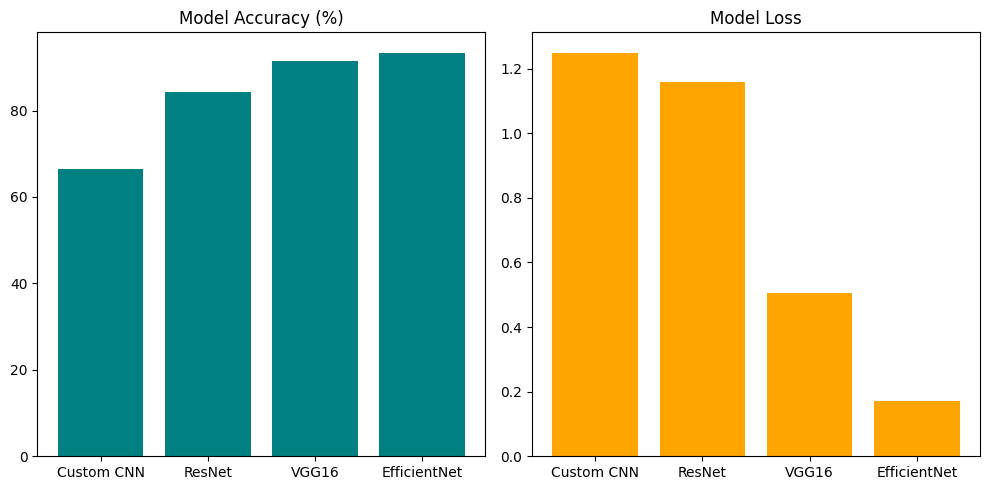

In [7]:
plt.figure(figsize=(10,5))

# Accuracy comparison
plt.subplot(1,2,1)
plt.bar(df["Model"], df["Accuracy"], color='teal')
plt.title("Model Accuracy (%)")

# Loss comparison
plt.subplot(1,2,2)
plt.bar(df["Model"], df["Loss"], color='orange')
plt.title("Model Loss")

plt.tight_layout()
plt.show()
